<a href="https://colab.research.google.com/github/ganeshap1995/Internsavy/blob/main/Internsavy_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

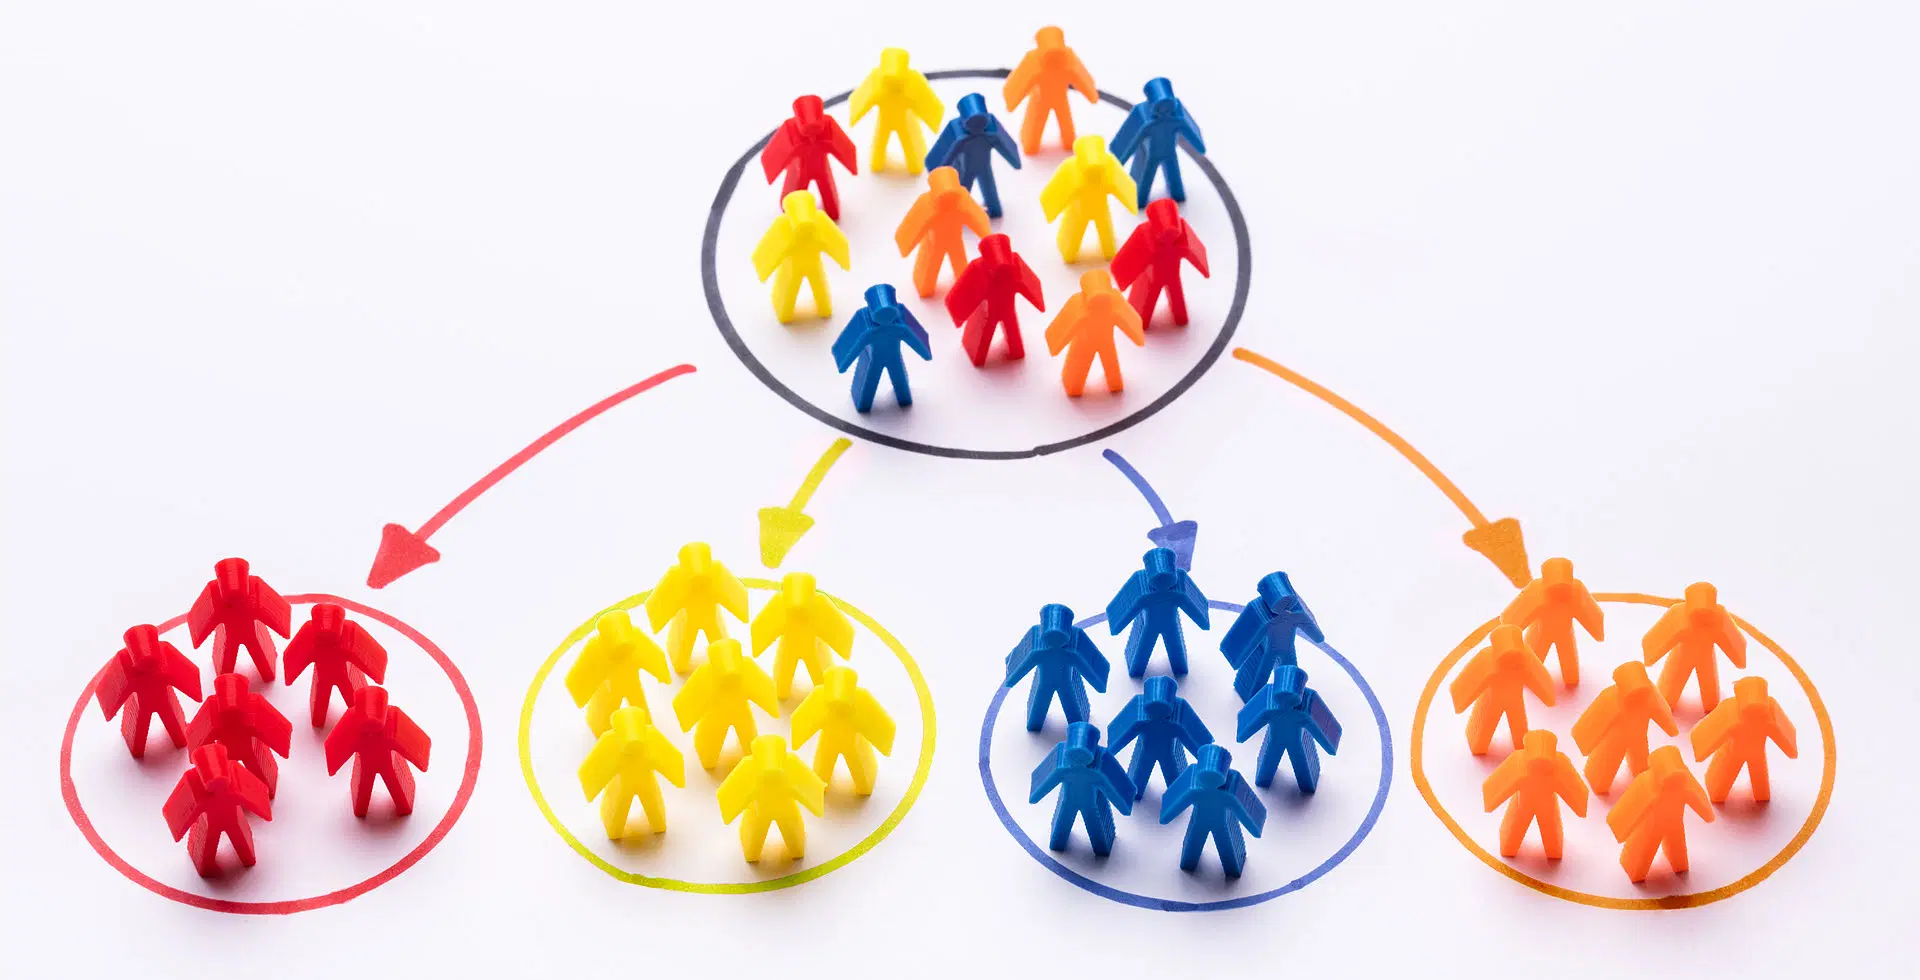

#**Project Name:** Applying Machine Learning Clustering Techniques to Analyze Customer Datasets.

#**Author Name:** Ganesh Arjun Patewar

#**Dataset_link:**(https://www.kaggle.com/datasets/shwetabh123/mall-customers)

#**Project description:**
###For this project I am using Mall_customers csv file. In this data there are 200 rows and 5 columns. On basis of Age,Annual Income (k$) and	Spending Score (1-100) we have to segementize the customers into optimal clusters.


####Importing Libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")


###Importing data:

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Python All/csv/Mall_Customers.csv')

###First look of data:

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


###Shape of data:

In [ ]:
df.shape

(200, 5)

###Data info:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


###Data decription:

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##Checking Null and duplicate values:

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no any null value.

In [ ]:
df.duplicated().sum()

0

There is no any duplicate value in this dataset.

###Dropping some columns:

In [ ]:
df.drop(['CustomerID'],axis=1,inplace=True)

###New look of data:

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
# List of Nuerical columns
num_col=list(df.select_dtypes('number'))
num_col

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

#Data Vizualization:

###Plot 1: Coutplot for Gender

In [ ]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Countplot for Gender')

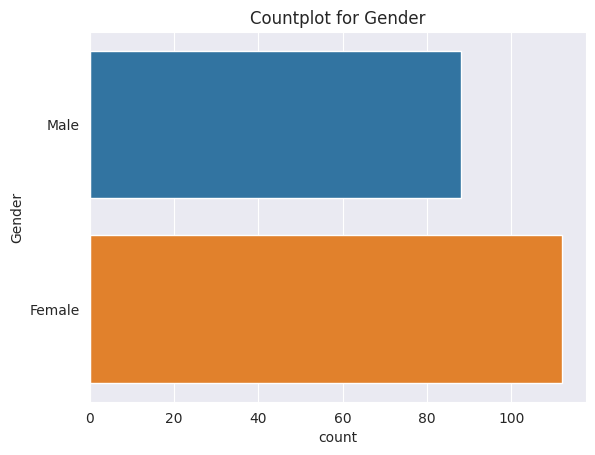

In [ ]:
sns.countplot(data=df, y='Gender')
plt.title('Countplot for Gender')

###Plot 2: Violinplot and Distplot of all features:

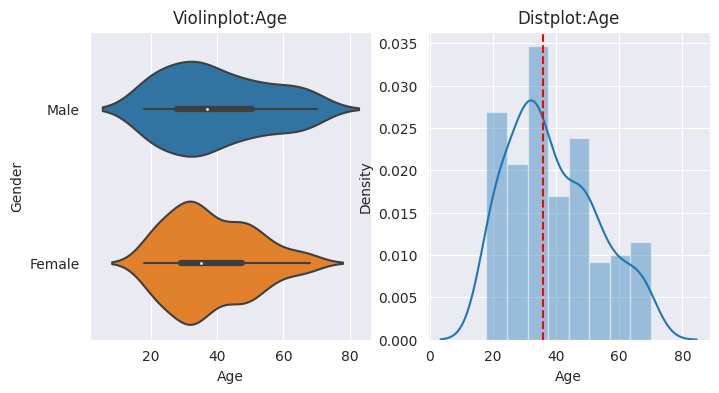

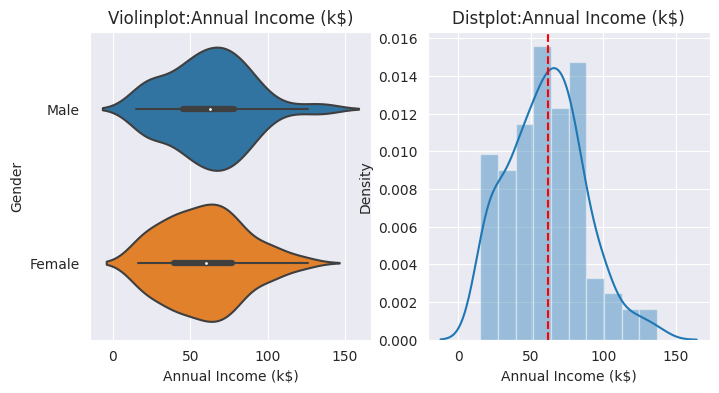

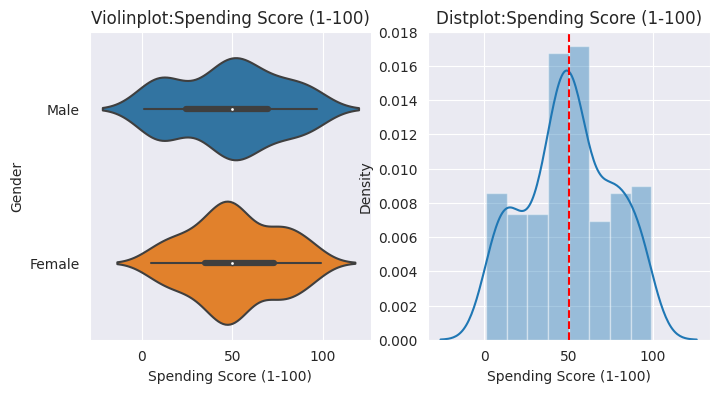

In [ ]:
for col in num_col:

  plt.figure(figsize=(8,4))

  plt.subplot(1,2,1)
  sns.violinplot(data=df,x=col, y='Gender')
  plt.title('Violinplot:' + col)

  plt.subplot(1,2,2)
  sns.distplot(df[col])
  median=np.median((df[col]))
  plt.axvline(median,color='red',linestyle='--', label='Median')
  plt.title('Distplot:' + col)

  plt.plot()



###Plot 3: Plotting countplot for age groups:

In [ ]:
# Creating new age groups
age_18_25=df[(df['Age']>=18) & (df['Age']<=25)]
age_26_35=df[(df['Age']>=26) & (df['Age']<=35)]
age_36_45=df[(df['Age']>=36) & (df['Age']<=45)]
age_46_55=df[(df['Age']>=46) & (df['Age']<=55)]
age_56_on=df[(df['Age']>=56)]

Text(0.5, 0, 'Age groups')

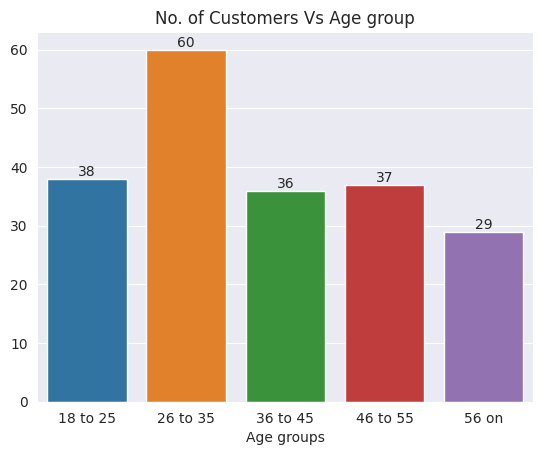

In [ ]:
age_x=['18 to 25','26 to 35','36 to 45','46 to 55','56 on']
age_y=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_56_on.values)]

age=sns.barplot(x=age_x, y=age_y)

for i in age.containers:
  age.bar_label(i)

plt.title('No. of Customers Vs Age group')
plt.xlabel('Age groups')

Maximum customers are from 26 to 35 age group.

###Plot 4: Relationplot between Annual Income (k$) and Spending Score (1-100)

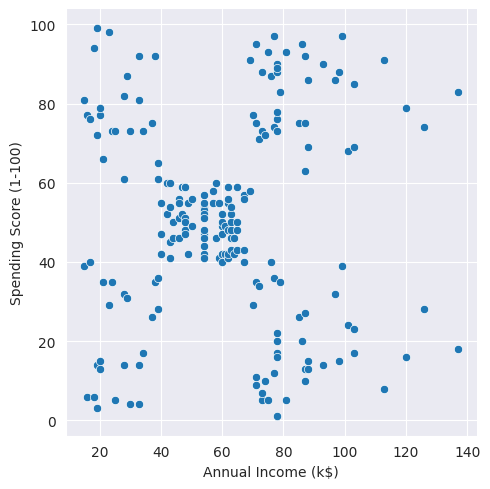

In [ ]:
sns.relplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])

Those customerd whose annual income is between 40000  and  60000 there Spending score is between 40 to 60.

###Plot 5: Countplot of Customer Distribution by Annual Income.

In [ ]:
income_15_40=df[(df['Annual Income (k$)']>=15)& (df['Annual Income (k$)']<=40)]
income_41_65=df[(df['Annual Income (k$)']>=41)& (df['Annual Income (k$)']<=65)]
income_66_90=df[(df['Annual Income (k$)']>=66)& (df['Annual Income (k$)']<=90)]
income_91_115=df[(df['Annual Income (k$)']>=91)& (df['Annual Income (k$)']<=115)]
income_116_on=df[(df['Annual Income (k$)']>=116)]


Text(0.5, 0, 'Income groups')

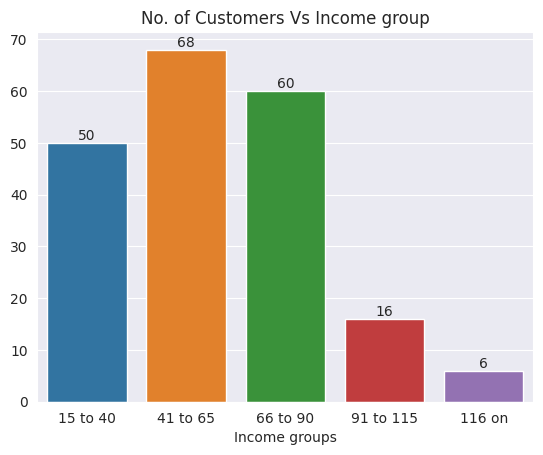

In [ ]:
income_x=['15 to 40','41 to 65','66 to 90','91 to 115','116 on']
income_y=[len(income_15_40.values),len(income_41_65.values),len(income_66_90.values),len(income_91_115.values),len(income_116_on.values)]

income=sns.barplot(x=income_x, y=income_y)

for i in income.containers:
  income.bar_label(i)

plt.title('No. of Customers Vs Income group')
plt.xlabel('Income groups')


Maximum customers having income between 41,000 to 65,000

###Plot 6: Countplot of Customer distribution by Spending Score

In [ ]:
score_1_20=df[(df['Spending Score (1-100)']>=1)&(df['Spending Score (1-100)']<=20)]
score_21_40=df[(df['Spending Score (1-100)']>=21)&(df['Spending Score (1-100)']<=40)]
score_41_60=df[(df['Spending Score (1-100)']>=41)&(df['Spending Score (1-100)']<=60)]
score_61_80=df[(df['Spending Score (1-100)']>=61)&(df['Spending Score (1-100)']<=80)]
score_81_100=df[(df['Spending Score (1-100)']>=81)]

Text(0.5, 0, 'Spending Scores')

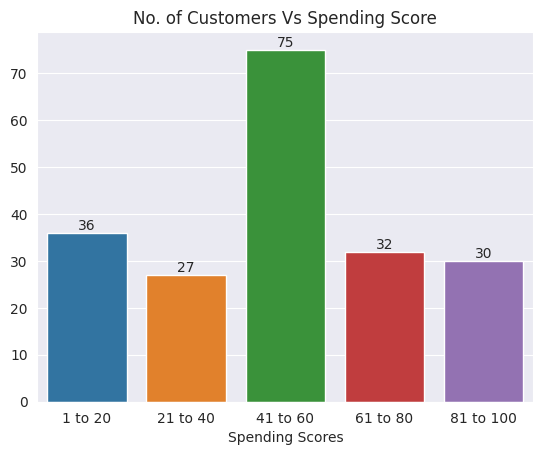

In [ ]:
score_x =['1 to 20','21 to 40','41 to 60','61 to 80','81 to 100']
score_y=[len(score_1_20),len(score_21_40),len(score_41_60),len(score_61_80),len(score_81_100)]

score=sns.barplot(x=score_x, y=score_y)
for i in score.containers:
  score.bar_label(i)

plt.title('No. of Customers Vs Spending Score')
plt.xlabel('Spending Scores')


Maximum customers having spending score between 41 to 60

#Model building using clustering algorithms:

###Plotting Elbow curve:

Text(0, 0.5, 'wcss')

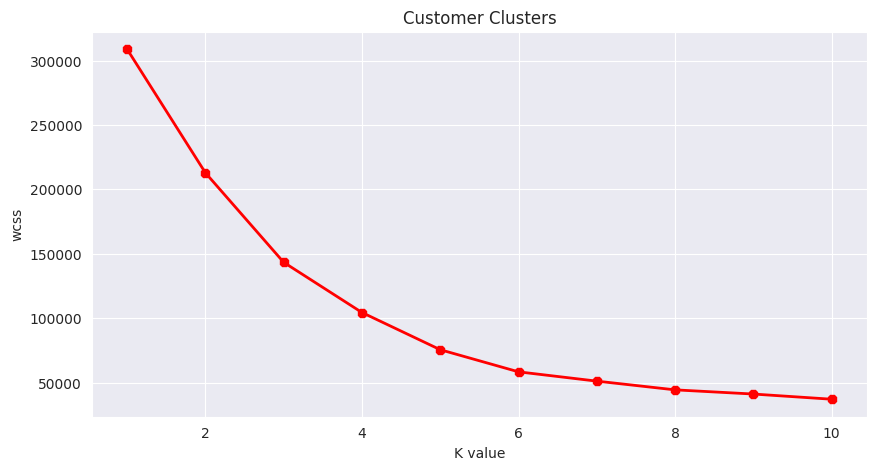

In [ ]:
new_df=df.iloc[:,1:] #Creating New_df by dropping 'Gender' column as it is categorical column.

wcss=[]  # Within-Cluster Sum of Square
for k in range(1,11):
  kmeans=KMeans(n_clusters= k, init= "k-means++")
  kmeans.fit(new_df)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,color='red',linewidth=2,marker='8')
plt.title('Customer Clusters')
plt.xlabel('K value')
plt.ylabel('wcss')


From this Elbow curve we can see that at K=5 the curve shows less slope so can we decide to take No. of Clusters= 5 for better clustering.

In [ ]:
# Setting the parameters in model
kmeans=KMeans(n_clusters=5,random_state=21)

# Fitting the data in model and finding the cluster for each data point
kmeans.fit_predict(new_df)

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [ ]:
# Co-ordinates of Centriods for each cluster
center=kmeans.cluster_centers_
center

array([[43.12658228, 54.82278481, 49.83544304],
       [40.32432432, 87.43243243, 18.18918919],
       [32.69230769, 86.53846154, 82.12820513],
       [45.2173913 , 26.30434783, 20.91304348],
       [25.27272727, 25.72727273, 79.36363636]])

###Plotting the 3D scatterplot after clustering

Text(0.5, 0.92, 'Customer clusters')

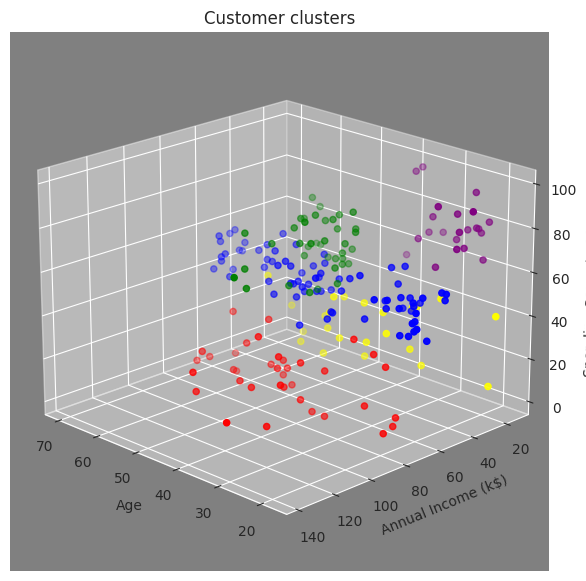

In [ ]:
clusters= kmeans.fit_predict(new_df)
df['label'] = clusters

fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(111,projection='3d')

# Plotting different clusters
ax.scatter(df.Age[df.label==0],df['Annual Income (k$)'][df.label==0],df['Spending Score (1-100)'][df.label==0],c='blue',label='cluster1')
ax.scatter(df.Age[df.label==1],df['Annual Income (k$)'][df.label==1],df['Spending Score (1-100)'][df.label==1],c='red',label='cluster2')
ax.scatter(df.Age[df.label==2],df['Annual Income (k$)'][df.label==2],df['Spending Score (1-100)'][df.label==2],c='green',label='cluster3')
ax.scatter(df.Age[df.label==3],df['Annual Income (k$)'][df.label==3],df['Spending Score (1-100)'][df.label==3],c='yellow',label='cluster4')
ax.scatter(df.Age[df.label==4],df['Annual Income (k$)'][df.label==4],df['Spending Score (1-100)'][df.label==4],c='purple',label='cluster5')
ax.view_init(20,135)

# Increase contrast and darkness
scatter.set_alpha(0.9)          # Increase transparency
scatter.set_edgecolors('k')    # Set edge color to black
scatter.set_linewidths(0.5)    # Set edge line width

# Set background color
ax.set_facecolor('gray')


# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer clusters')

Now we can see there are total 5 clusters in which all cutomers are segmented.